In [1]:
import numpy as np
import pandas as pd

class Die():
'''General Definition
A die has 𝑁 sides, or “faces”, and 𝑊 weights,
and can be rolled to select a face.
For example, a “die” with 𝑁=2 is a coin, and
a one with 𝑁=6 is a standard die.
Normally, dice and coins are “fair,” meaning that the
each side has an equal weight.
An unfair die is one where the weights are unequal.
Each side contains a unique symbol.
Symbols may be all alphabetic or all numeric.
𝑊 defaults to 1.0 for each face
but can be changed after the object is created.
The weights are just positive numbers (integers or floats, including 0),
not a normalized probability distribution.
The die has one behavior, which is to be rolled one or more times.
Specific Methods and Attributes:
    1. An initializer
    2. Change the weight of a single side.
    3. Create die
    4. Roll die
    5. Show die's current state
'''
def __init__(self, faces):

    self.faces = faces
    if type (faces) != ''
    
    self.weights = np.ones(len (self.faces))
"Initalize the object by defining the number of rolls and the die weights. self.n_rolls = 10
# throw numpy error if not a NumPy arrat
self.weights = [1,1,1,1,1,1]
# def create_die(self):
"Create the die using the object's weights. Save to self as a DataFrame."
self.n_sides = len(self.weights)
self.my_probs = [i/sum(self.weights) for i in self.weights]
self.die = pd.DataFrame({
'side': range(1, self.n_sides + 1),
'weights': self.my_probs
})

def roll_die(self):
"Roll the die using the object's specified number of rolls and die. Save to results = []
for i in range(self.n_rolls):
result = self.die.side.sample(weights=self.die.weights).values[0]
results.append(result)
self.results = pd.Series(results)

def plot_results(self):
"Plot the results using the state stored in self."
prob_model = pd.Series({i+1:round(p, 2) for i, p in enumerate(self.my_probs)})
print("Sides:", self.n_sides)
print("Model:")
print(prob_model)
print("Rolls:", self.n_rolls)
self.results.value_counts().sort_index().plot.bar(rot=0);
# We add another method because it's so easy :-)
def plot_probs(self):
"Plot the probabilities of the die sides."
pd.Series(self.my_probs).plot.pie(title="Die Model")
def do_it_all(self):
"The main function that does everything."
self.create_die()
self.roll_die()
self.plot_results()

SyntaxError: unterminated string literal (detected at line 57) (1947199915.py, line 57)

In [12]:
import numpy as np
import pandas as pd

def initializer (faces):
    # Takes a NumPy array of faces as an argument.

    # verify faces is type (np.ndarray); TypeError if not
    if not isinstance (faces, np.ndarray):
        raise TypeError('faces is not an np array')

    # Tests to see if the values are distinct; ValueError if not
    if len(faces) != len(set(faces)):    # 'set' values are unique
        raise ValueError('faces are not unique')
        # faces = np.unique (faces) will remove "redundant" values        

    # Internally initializes the weights to 1.0 for each face.
    weights = np.ones(len(faces))
    #print (faces, weights)

    # Saves both faces and weights in a private data frame
    #   with faces in the index.
    index_values = [faces]
    faces_df = pd.DataFrame({'weights': weights}, index=index_values)
    return (faces_df)
    
faces = np.arange (6)  # creates array
#print (faces)
faces_df = initializer(faces)
print (faces_df)

   weights
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0


In [13]:
import numpy as np
import pandas as pd

def change_weight (face_to_change, new_weight):
    # Takes two arguments: the face value to be changed and the new weight.

    # Checks to see if the face passed is valid value,
    #   i.e. if it is in the die array; IndexError if not
    if face_to_change not in faces_df.index:
        raise IndexError('face_to_change not in faces.df')

    # Checks to see if the weight is a valid type,
    #   i.e. if it is numeric (integer or float); TypeError if not
    if not isinstance(new_weight, (int, float)):
        raise TypeError('new_weight is not valid type')

    # change face's weight
    faces_df.loc[face_to_change] = new_weight
    
change_weight (4, 5)
print (faces_df)

   weights
0      1.0
1      1.0
2      1.0
3      1.0
4      5.0
5      1.0


   side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.1
4     5      0.5
5     6      0.1 
sum of weights: 1.0
number of rolls: 1000


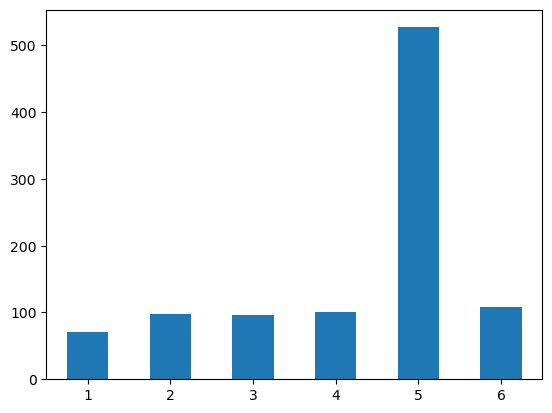

In [14]:
import numpy as np
import pandas as pd

def create_die (faces_df):
    # Create the die using the object's weights. 
    #   Save to self as a DataFrame."
    n_sides = len(faces_df.weights)
    my_probs = [i/sum(faces_df.weights) for i in faces_df.weights]
    die = pd.DataFrame({
    'side': range(1, n_sides + 1),
    'weights': my_probs
    })
    return (die)

def roll_die (number_of_rolls=1):
    # Takes a parameter of how many times the die is to be rolled; 
    #   defaults to 1.
       
    print (die, '\nsum of weights:', sum(die.weights))
    print ('number of rolls:', number_of_rolls)   
    
    # This is essentially a random sample with replacement,
    #   from the private die data frame, that applies the weights.
    results = []
    for i in range(number_of_rolls):
        result = die.side.sample(weights=die.weights, replace=True).values[0]
        
#        print (result)
        results.append(result)
#        print (results)
    results = pd.Series(results)
    return (results)
    #return pd.Series(results)

#    def plot_results(my_results):

def plot_results(my_results):
    "Show the results of rolling the dice n times with a simple bar graph."
    results.value_counts().sort_index().plot.bar(rot=0);
    # A method to show the die’s current state.
    #  Returns a copy of the private die data frame.

die = create_die (faces_df)
results = roll_die (1000)
plot_results (results)